<a href="https://colab.research.google.com/github/denis5ds/IA-sis420/blob/main/Primerparcial/primerparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

conectandi al drive

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Librerias que se usan

In [156]:
#librerias que se van a utilizar
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import pandas as pd # para el preprocesamiento
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import csv
%matplotlib inline


cargamos los datos del dataset
https://www.kaggle.com/datasets/mikolajbabula/adult-census-income-data

1   Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

crea las 3 columnas sisteticas y tambien realiza el mapeo de llas




In [157]:
# Cargado de datos
df = pd.read_csv("/content/drive/MyDrive/IA/datasets/adult.csv", sep=",")

# Mapeo 1
mapeo1 = {"Private": 1, "Self-emp-not-inc": 2, "Local-gov":3, "?":4, "State-gov":5, "Self-emp-inc":6, "Federal-gov":7, "Without-pay":8, "Never-worked":9}
df["workclass"] = df["workclass"].replace(mapeo1)

# Mapeo 2
mapeo2 = {"HS-grad": 1, "Some-college": 2, "Bachelors":3, "Masters":4, "Assoc-voc":5, "11th":6, "Assoc-acdm":7, "10th":8, "7th-8th":9, "Prof-school":10,
          "9th":11, "12th":12, "Doctorate":13, "5th-6th":14, "1st-4th":15, "Preschool":16}
df["education"] = df["education"].replace(mapeo2)

# Mapeo 3
mapeo3 = {"Married-civ-spouse": 1, "Never-married": 2, "Divorced":3, "Separated":4, "Widowed":5, "Married-spouse-absent":6, "Married-AF-spouse":7}
df["marital.status"] = df["marital.status"].replace(mapeo3)

# Mapeo 4
mapeo4 = {"Prof-specialty": 1, "Craft-repair": 2, "Exec-managerial":3, "Adm-clerical":4, "Sales":5, "Other-service":6, "Machine-op-inspct":7, "?":8,
          "Transport-moving":9, "Handlers-cleaners":10, "Farming-fishing":11, "Tech-support":12, "Protective-serv":13, "Priv-house-serv":14, "Armed-Forces":15}
df["occupation"] = df["occupation"].replace(mapeo4)

# Mapeo 5
mapeo5 = {"Husband": 1, "Not-in-family": 2, "Own-child":3, "Unmarried":4, "Wife":5, "Other-relative":6}
df["relationship"] = df["relationship"].replace(mapeo5)

# Mapeo 6
mapeo6 = {"White": 1, "Black": 2, "Asian-Pac-Islander":3, "Amer-Indian-Eskimo":4, "Other":5}
df["race"] = df["race"].replace(mapeo6)

# Mapeo 7
mapeo7 = {"Male": 1, "Female": 2}
df["sex"] = df["sex"].replace(mapeo7)

# Mapeo 8
mapeo8 = {"?": 0,"United-States": 0,"Mexico": 0,"Philippines": 0,"Germany": 0,"Canada": 0,"Puerto-Rico": 0,"El-Salvador": 0,"India": 0,"Cuba": 0,"England": 0,"Jamaica": 0,
          "South": 0,"China": 0, "Italy": 1, "Dominican-Republic": 1, "Vietnam": 1, "Guatemala": 1, "Japan": 1, "Poland": 1, "Columbia": 1, "Taiwan": 1, "Haiti": 1,
          "Iran": 1, "Portugal": 1, "Nicaragua": 1, "Peru": 1, "Greece": 1, "Holand-Netherlands": 2, "France": 2, "Ecuador": 2, "Ireland": 2, "Hong": 2,
          "Trinadad&Tobago": 2, "Cambodia": 2, "Laos": 2, "Thailand": 2, "Yugoslavia": 2, "Outlying-US(Guam-USVI-etc)": 2, "Honduras": 2, "Hungary": 2, "Scotland": 2}
df["native.country"] = df["native.country"].replace(mapeo8)

# Se eliminan los datos que entran en conflicto con las operaciones
df = df.drop('income', axis=1)
df = df.drop('fnlwgt', axis=1)
df.drop_duplicates()
df.dropna(axis=0, thresh=2)  # Elimina filas con 2 o más valores nulos.


###################################################################################################
#Agregando las nuevas 3 columnas sinteticas

# Columna de texto (grupo de edad según la columna "age")
def clasificar_edad(age):
    if age < 25:
        return 'Joven'
    elif 25 <= age < 50:
        return 'Adulto'
    else:
        return 'Mayor'

df['age_group'] = df['age'].apply(clasificar_edad)
#mapeo9
mapeo9 = {"Joven":1,"Adulto":2,"Mayor":3}
df["age_group"] = df["age_group"].replace(mapeo9)


# Columna booleana (si trabaja más de 40 horas por semana)
df['high_hours_per_week'] = df['hours.per.week'] > 40

# Columna de opciones (si la persona fuma o bebe)
df['smokes_or_drinks'] = np.random.choice(['Sí', 'No', 'No se sabe'], size=len(df))

# Reemplazar los valores de 'Sí', 'No', 'No se sabe' por números
df['smokes_or_drinks'] = df['smokes_or_drinks'].replace({'Sí': 2, 'No': 1, 'No se sabe': 0})

# Reemplazar los valores True por 2 y False por 1 en la columna high_hours_per_week
df['high_hours_per_week'] = df['high_hours_per_week'].replace({True: 2, False: 1})

# Verificar que las columnas se hayan agregado correctamente
####################################################################################################
print(df.head())

   age  workclass  education  education.num  marital.status  occupation  \
0   90          4          1              9               5           8   
1   82          1          1              9               5           3   
2   66          4          2             10               5           8   
3   54          1          9              4               3           7   
4   41          1          2             10               4           1   

   relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
0             2     1    2             0          4356              40   
1             2     1    2             0          4356              18   
2             4     2    2             0          4356              40   
3             4     1    2             0          3900              40   
4             3     1    2             0          3900              40   

   native.country  age_group  high_hours_per_week  smokes_or_drinks  
0               0          3      

ver cantidad de datos de cada clase

In [158]:
df["native.country"].value_counts()

,count
native.country,
0,31593
1,724
2,244


informacion del dataset modificado

In [159]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  32561 non-null  int64
 1   workclass            32561 non-null  int64
 2   education            32561 non-null  int64
 3   education.num        32561 non-null  int64
 4   marital.status       32561 non-null  int64
 5   occupation           32561 non-null  int64
 6   relationship         32561 non-null  int64
 7   race                 32561 non-null  int64
 8   sex                  32561 non-null  int64
 9   capital.gain         32561 non-null  int64
 10  capital.loss         32561 non-null  int64
 11  hours.per.week       32561 non-null  int64
 12  native.country       32561 non-null  int64
 13  age_group            32561 non-null  int64
 14  high_hours_per_week  32561 non-null  int64
 15  smokes_or_drinks     32561 non-null  int64
dtypes: int64(16)
memory us

duplicacion de los datos

In [160]:
# 1. Obtener estadísticas descriptivas del DataFrame original
mean_values = df.mean()  # Calcula la media de cada columna en el DataFrame original
std_values = df.std()    # Calcula la desviación estándar de cada columna en el DataFrame original

# 2. Crear una función para generar datos sintéticos
def generar_datos_sinteticos(df, num_nuevos):
    datos_nuevos = []  # Lista para almacenar los datos sintéticos generados

    for _ in range(num_nuevos):
        nuevo_dato = {}  # Diccionario para almacenar un nuevo dato sintético

        for col in df.columns:  # Iterar sobre cada columna del DataFrame original
            if df[col].dtype == 'object':  # Si la columna es de tipo categórico
                nuevo_dato[col] = np.random.choice(df[col].unique())  # Seleccionar aleatoriamente un valor de los valores únicos de la columna
            elif df[col].dtype == 'int64' or df[col].dtype == 'float64':  # Si la columna es numérica
                mean = mean_values[col]  # Obtener la media de la columna
                std = std_values[col]    # Obtener la desviación estándar de la columna
                nuevo_dato[col] = np.random.normal(mean, std)  # Generar un nuevo valor con una distribución normal basada en la media y desviación estándar

                # Ajustar para mantener la coherencia
                if col in ['hours.per.week', 'capital.gain', 'capital.loss']:
                    nuevo_dato[col] = max(0, nuevo_dato[col])  # Asegurarse de que los valores generados no sean negativos
            else:
                nuevo_dato[col] = np.nan  # Asignar NaN si el tipo de columna no es manejado
        datos_nuevos.append(nuevo_dato)  # Añadir el nuevo dato sintético a la lista

    return pd.DataFrame(datos_nuevos)  # Convertir la lista de diccionarios en un DataFrame

# Generar datos sintéticos
num_nuevos = len(df)  # Definir el número de datos sintéticos a generar (igual al número de datos originales para duplicar)
df_nuevos = generar_datos_sinteticos(df, num_nuevos)  # Llamar a la función para generar los datos sintéticos

# Combinar datos originales con los nuevos
df_completo = pd.concat([df, df_nuevos], ignore_index=True)  # Concatenar los datos originales con los nuevos y reiniciar los índices

# Verificar el resultado
print(df_completo.shape)  # Imprimir la forma (número de filas y columnas) del DataFrame combinado

(65122, 16)


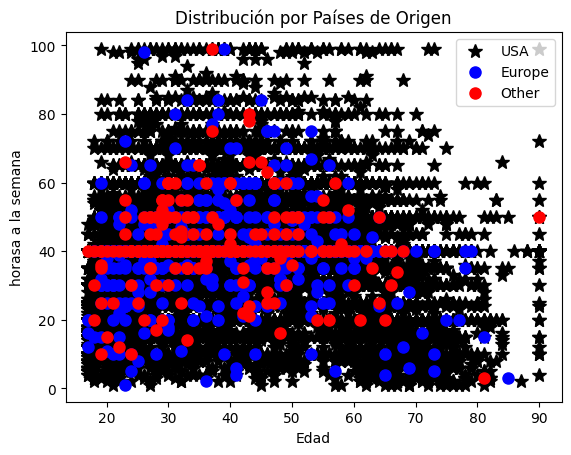

In [161]:
import matplotlib.pyplot as plt

def plotDataNativeCountry(X, y):
    # Encuentra los índices para los diferentes valores de la columna native.country
    usa = y == 0  # Suponiendo que "0" es para "United-States" (u otro valor numérico asignado)
    europe = y == 1  # Suponiendo que "1" representa países de Europa
    other = y == 2  # Suponiendo que "2" representa otros países

    # Crea una nueva figura
    fig = plt.figure()

    # Graficar ejemplos
    plt.plot(X[usa, 0], X[usa, 1], 'k*', lw=2, ms=10, label='USA')
    plt.plot(X[europe, 0], X[europe, 1], 'bo', mfc='b', ms=8, label='Europe')
    plt.plot(X[other, 0], X[other, 1], 'ro', mfc='r', ms=8, label='Other')

    # Adiciona etiquetas para los ejes
    plt.xlabel('Edad')
    plt.ylabel('horasa a la semana')
    plt.legend()
    plt.title('Distribución por Países de Origen')
    plt.show()

# Llama a la función con X (variables) y la columna 'native.country' como y
X = df[['age', 'hours.per.week']].values  # Usando columnas como ejemplo de entrada
y = df['native.country'].values  # 'native.country' es la columna objetivo

plotDataNativeCountry(X, y)

graficos de distrivucion del dataset antiguo y el dataset modificado y duplicado con datos sintetico

In [162]:
df.dropna(axis=0, thresh=2)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_group,high_hours_per_week,smokes_or_drinks
0,90,4,1,9,5,8,2,1,2,0,4356,40,0,3,1,2
1,82,1,1,9,5,3,2,1,2,0,4356,18,0,3,1,1
2,66,4,2,10,5,8,4,2,2,0,4356,40,0,3,1,0
3,54,1,9,4,3,7,4,1,2,0,3900,40,0,3,1,0
4,41,1,2,10,4,1,3,1,2,0,3900,40,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,2,10,2,13,2,1,1,0,0,40,0,1,1,0
32557,27,1,7,12,1,12,5,1,2,0,0,38,0,2,1,2
32558,40,1,1,9,1,7,1,1,1,0,0,40,0,2,1,2
32559,58,1,1,9,5,4,4,1,2,0,0,40,0,3,1,1


In [163]:
df_completo.dropna(axis=0, thresh=2)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,age_group,high_hours_per_week,smokes_or_drinks
0,90.000000,4.000000,1.000000,9.000000,5.000000,8.000000,2.000000,1.000000,2.000000,0.000000,4356.000000,40.000000,0.000000,3.000000,1.000000,2.000000
1,82.000000,1.000000,1.000000,9.000000,5.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4356.000000,18.000000,0.000000,3.000000,1.000000,1.000000
2,66.000000,4.000000,2.000000,10.000000,5.000000,8.000000,4.000000,2.000000,2.000000,0.000000,4356.000000,40.000000,0.000000,3.000000,1.000000,0.000000
3,54.000000,1.000000,9.000000,4.000000,3.000000,7.000000,4.000000,1.000000,2.000000,0.000000,3900.000000,40.000000,0.000000,3.000000,1.000000,0.000000
4,41.000000,1.000000,2.000000,10.000000,4.000000,1.000000,3.000000,1.000000,2.000000,0.000000,3900.000000,40.000000,0.000000,2.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65117,52.274795,2.521854,-1.266817,7.582289,2.508822,10.553792,1.813433,0.959690,1.556145,0.000000,129.224829,27.848968,-0.253187,2.359774,1.181807,1.563970
65118,48.374581,3.404289,5.461658,11.586245,1.946789,0.304807,3.434811,0.468035,1.439188,4240.425352,0.000000,43.580176,0.019037,2.748075,1.751631,2.973485
65119,47.889682,2.456501,7.335320,9.188622,0.437453,6.110820,1.667444,-0.242307,0.782807,7503.342796,113.969430,43.836081,-0.029372,2.461173,1.576119,0.981509
65120,49.032423,6.112999,3.121410,10.243749,1.326021,9.392046,1.824025,1.076292,1.462004,5185.530373,3.743099,37.951957,-0.036558,2.666489,1.319163,-0.519717


#Regrecion logistica

normalize

## Se asina el 80% de los datos para entrenar el modelo y el 20% para testear

In [164]:
# La entrada es de 16 elemento contando con x0
input_layer_size  = 16
#3 clases
num_labels = 3

X = df_completo.iloc[:52097, :-1]
X_test = df.iloc[13000:, :-1]
y = df_completo.iloc[:52097, df_completo.columns.get_loc("native.country")]
y_test = df.iloc[13000:, df_completo.columns.get_loc("native.country")]

#Cargando los valores ya procesados a las variables correspondientes

In [165]:
print(X.iloc[0,: ])
print(y)

age                      90.0
workclass                 4.0
education                 1.0
education.num             9.0
marital.status            5.0
occupation                8.0
relationship              2.0
race                      1.0
sex                       2.0
capital.gain              0.0
capital.loss           4356.0
hours.per.week           40.0
native.country            0.0
age_group                 3.0
high_hours_per_week       1.0
Name: 0, dtype: float64
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
52092    0.083840
52093   -0.109559
52094    0.064634
52095    0.116087
52096   -0.108181
Name: native.country, Length: 52097, dtype: float64


#Normalizacion

In [166]:
def featureNormalize(X):
    # Crea una copia del DataFrame/array de entrada X para evitar modificar el original
    X_norm = X.copy()

    # Inicializa los vectores mu y sigma para almacenar la media y desviación estándar
    mu = np.zeros(X.shape[1])  # Vectores de ceros con el tamaño de las columnas de X
    sigma = np.zeros(X.shape[1])  # Vectores de ceros con el tamaño de las columnas de X

    # Calcula la media de cada columna en X
    mu = np.mean(X, axis=0)

    # Calcula la desviación estándar de cada columna en X
    sigma = np.std(X, axis=0)

    # Normaliza X restando la media y dividiendo por la desviación estándar
    # Esto convierte cada columna en un conjunto de datos con media 0 y desviación estándar 1
    X_norm = (X - mu) / sigma

    # Retorna el DataFrame/array normalizado, la media y la desviación estándar utilizadas
    return X_norm, mu, sigma

In [167]:
# Normaliza los datos utilizando la función featureNormalize
X_norm, mu, sigma = featureNormalize(X)

In [168]:
# Obtiene el número de ejemplos (m) y el número de características (n) de X
m, n = X.shape

# Actualiza X para que sea igual a sus datos normalizados
X = X_norm

#Sigmoid

In [169]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

#Funcion costo

In [170]:
def lrCostFunction(theta, X, y, lambda_):

    # Número de ejemplos de entrenamiento
    m = y.size

    # Asegúrate de que y esté en formato entero (necesario si y es booleano)
    if y.dtype == bool:
        y = y.astype(int)

    # Inicializa el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    # Calcula la hipótesis (probabilidades predichas) usando la función sigmoide
    h = sigmoid(X.dot(theta.T))

    # Copia de theta para regularización (se establece theta[0] a 0 para no regularizar el término de sesgo)
    temp = theta.copy()
    temp[0] = 0

    # Calcula el costo con la regularización
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Calcula el gradiente sin regularización
    grad = (1 / m) * (h - y).dot(X)

    # Calcula el gradiente con la regularización (se suma lambda_ * theta a grad)
    grad = grad + (lambda_ / m) * temp

    return J, grad

#One Vs ALL

In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    # Número de ejemplos (m) y número de características (n)
    m, n = X.shape

    # Inicializar el array para almacenar los parámetros de cada clasificador
    all_theta = np.zeros((num_labels, n + 1))

    # Añadir una columna de unos a X para el término de sesgo (intercepto)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Entrenar un clasificador por cada clase
    for c in np.arange(num_labels):
        # Inicializar theta para el clasificador actual
        initial_theta = np.zeros(n + 1)

        # Configurar las opciones para el optimizador
        options = {'maxiter': 50}

        # Utilizar la función de optimización para encontrar el mejor theta
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        # Almacenar los parámetros del clasificador en all_theta
        all_theta[c] = res.x

    return all_theta

In [ ]:
lambda_ = 0.1  # Valor del parámetro de regularización
all_theta = oneVsAll(X, y, num_labels, lambda_)  # Entrenamiento del clasificador
print(all_theta.shape)  # Imprime la forma de la matriz de parámetros

(3, 16)


In [ ]:
print(all_theta)

[[ 4.12327230e-01  1.87925107e-02  2.39316040e-02  9.81238417e-03
   5.71314073e-02 -2.57954388e-02 -1.51090427e-02 -1.90914024e-03
  -4.25995117e-02 -1.61877306e-02 -7.43271079e-01 -3.26972812e-01
   1.56210940e-02 -5.23916130e-01  1.47533705e-02  3.22180846e-02]
 [-5.50859584e+00  5.54009124e-02 -3.62016539e-02  3.11384588e-01
  -8.09668694e-02  1.07726769e-01 -3.58375026e-03  1.30957204e-01
   2.16341318e-01 -1.63761509e-01 -1.22501195e-01 -2.13372115e-01
   4.73441413e-02  9.66626672e-01 -4.12109138e-02 -2.08707137e-01]
 [-2.40267715e+01 -1.36836695e-01 -5.57702552e-03 -1.11751617e-01
   4.60555166e-02 -6.17100450e-02 -4.82637573e-02 -5.79176664e-02
  -2.27013839e-01  7.17621797e-02  4.90532812e-02 -1.48663890e-02
  -6.05698666e-02  3.71992976e+00  1.27675431e-01  1.84370960e-01]]


#Funcion prediccion

In [ ]:

##############################################################

def predictOneVsAll(all_theta, X):
    m = X.shape[0]  # Número de ejemplos de entrenamiento
    num_labels = all_theta.shape[0]  # Número de etiquetas (clases)

    p = np.zeros(m)  # Vector para almacenar las predicciones

    # Añadir una columna de unos a la matriz X para el término de sesgo
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Calcular las predicciones usando la función sigmoide y elegir la clase con la mayor probabilidad
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

    return p

In [ ]:


print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))


(52097, 15)
Precision del conjuto de entrenamiento: 62.07%
